# Data Access

#  Import The Data

* We Have Stored Our Data In MySQL DataBase.
* Connecting DataBase To NoteBook And Doing Other Part

In [1]:
import mysql.connector
import os
import pymysql
import pandas as pd

In [2]:
db_name = "webscraping"             #database name
db_host = "localhost"               #Host
db_username = "root"                #Username
db_password = "rajesh@1929"         #Password

In [3]:
#exception Handling
try:
    conn = pymysql.connect(host = db_host,
                         port = int(3306),
                         user = 'root',
                         password = db_password,
                         db = db_name)
except e:
    print(e)

In [4]:
if conn:
    print("Sucessfully Connected")
else:
    print("Error")

Sucessfully Connected


* As We Seen Above SQL is Connected Sucessfully

# DATA

* Reading The Data

In [5]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [6]:
df = pd.read_sql_query('SELECT * FROM mobiles_data',conn)

In [7]:
df.head()

,ProductName,Stars,Ratings,Reviews,Price,ROM,Display,Camera,Processor,MyUnknownColumn
0,APPLE iPhone 11 (White,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,
1,APPLE iPhone 11 (White,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,
2,APPLE iPhone 11 (Black,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,
3,APPLE iPhone 11 (Green,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,
4,APPLE iPhone 11 (Black,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,


* Cleaning The MyUnknownColumn Data

In [8]:
df['MyUnknownColumn'].sample(5)

4                                
13                               
38     6 Core Processor Processor
35                               
9      6 Core Processor Processor
Name: MyUnknownColumn, dtype: object

In [9]:
#combining Processor and myunknowncolumn into NEW column
df['Processorr'] = df['Processor']+df['MyUnknownColumn']

In [10]:
df['Processorr'].sample(5)

5                             A13 Bionic Chip Processor
39                            A15 Bionic Chip Processor
1                             A13 Bionic Chip Processor
19                            A15 Bionic Chip Processor
35    A13 Bionic Chip with 3rd Gen Neural Engine Pro...
Name: Processorr, dtype: object

In [11]:
#droping the column
new = df.drop(['Processor','MyUnknownColumn'],axis=1)

In [12]:
new.head()

,ProductName,Stars,Ratings,Reviews,Price,ROM,Display,Camera,Processorr
0,APPLE iPhone 11 (White,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
1,APPLE iPhone 11 (White,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
2,APPLE iPhone 11 (Black,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
3,APPLE iPhone 11 (Green,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
4,APPLE iPhone 11 (Black,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor


# EDA

In [13]:
new.head()

,ProductName,Stars,Ratings,Reviews,Price,ROM,Display,Camera,Processorr
0,APPLE iPhone 11 (White,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
1,APPLE iPhone 11 (White,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
2,APPLE iPhone 11 (Black,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
3,APPLE iPhone 11 (Green,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
4,APPLE iPhone 11 (Black,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor


In [14]:
new.shape

(48, 9)

* Hence These Is A SMall Data, There Are 48Rows & 9 Columns

<AxesSubplot:>

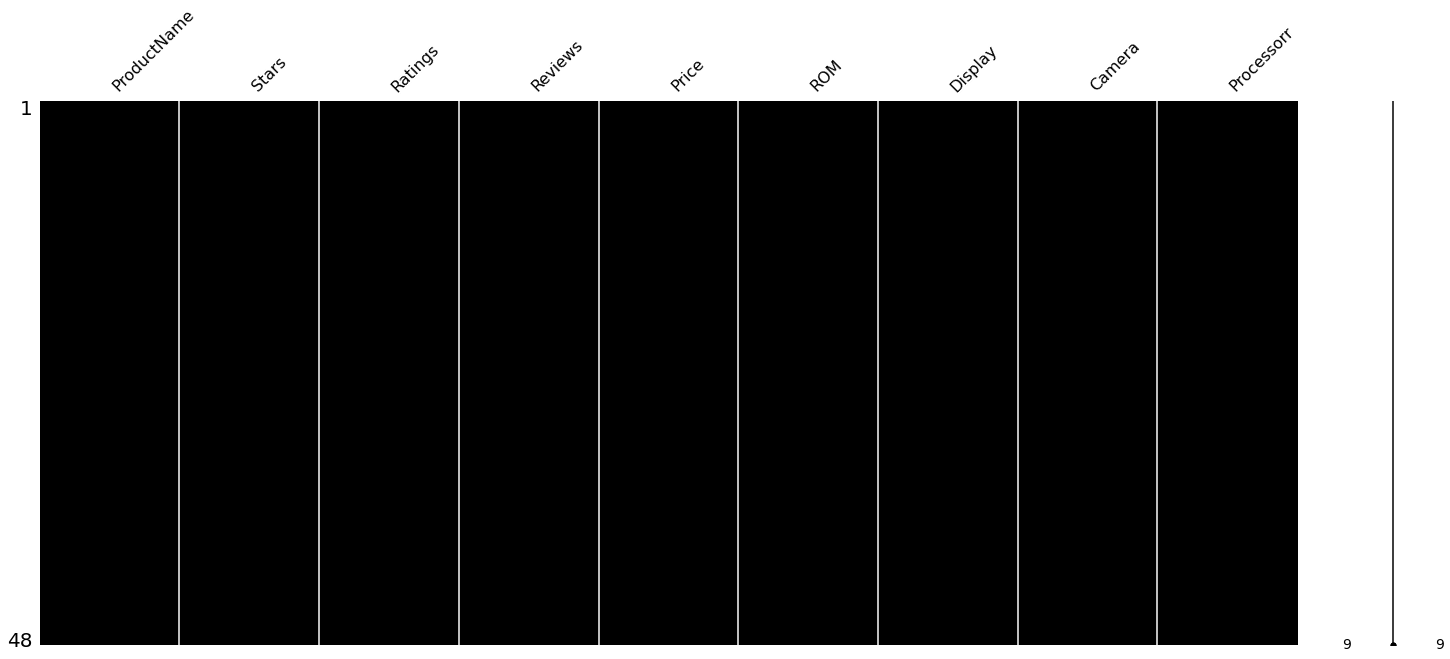

In [15]:
#checking the null values
import missingno as msno
msno.matrix(new, color=(0, 0, 0))

* There Are No NULL Values

# Visuvalization

In [16]:
import seaborn as sns


C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

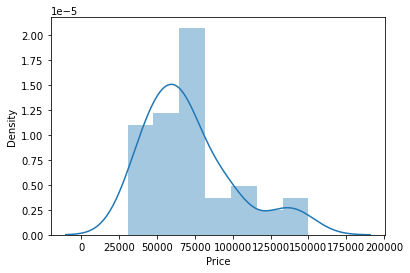

In [17]:
sns.distplot(new['Price'])

<AxesSubplot:>

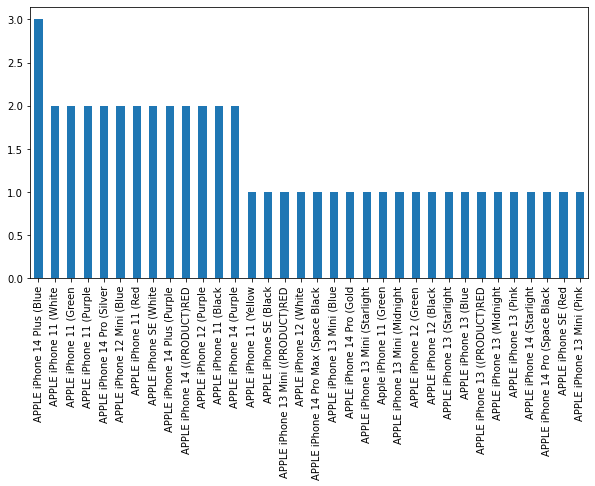

In [18]:
new['ProductName'].value_counts().plot(kind='bar',figsize= (10,5))

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

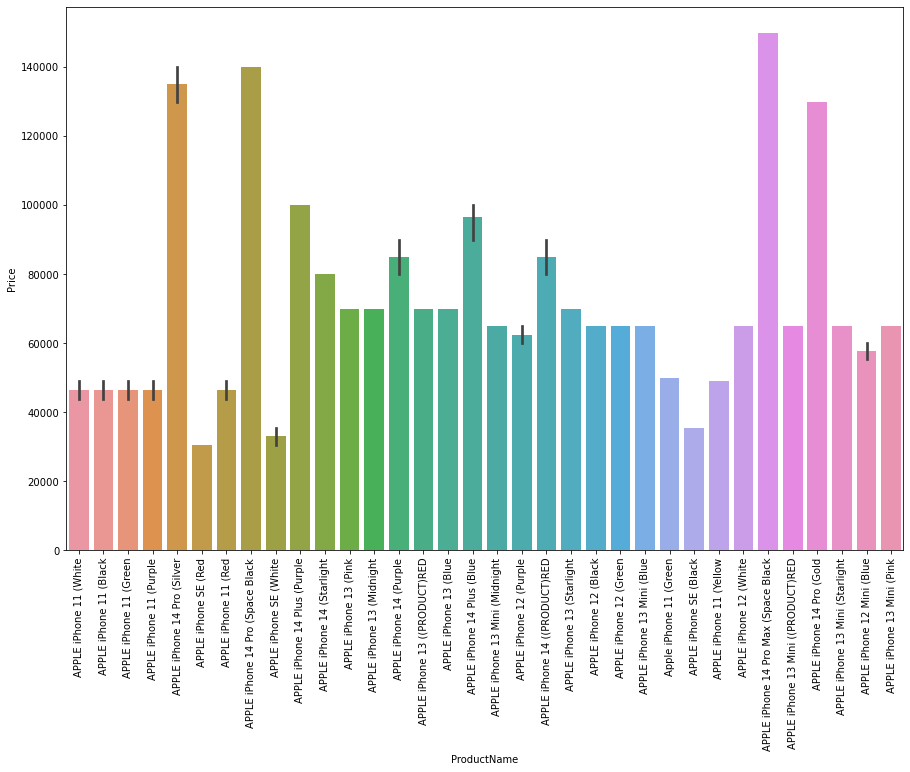

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x=new['ProductName'],y=new['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

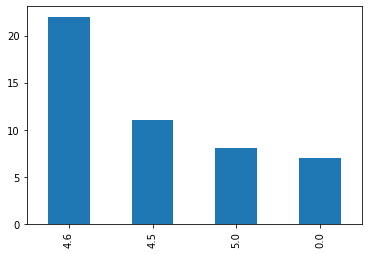

In [21]:
new['Stars'].value_counts().plot(kind='bar')

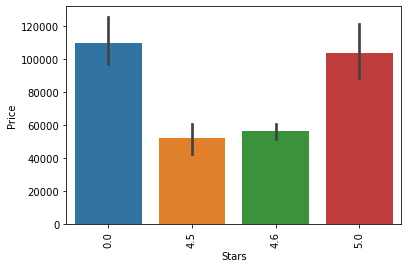

In [22]:
sns.barplot(x=new['Stars'],y=new['Price'])
plt.xticks(rotation='vertical')
plt.show()

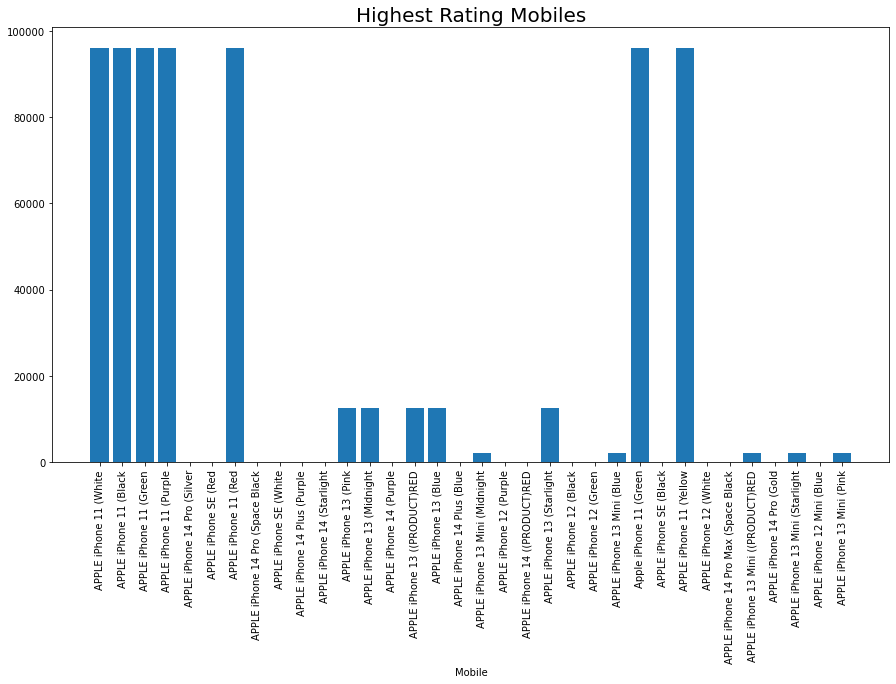

In [23]:
plt.figure(figsize=(15,8))
plt.bar(x=new['ProductName'],height = new['Ratings'])
plt.title('Highest Rating Mobiles',fontsize=20)
plt.xlabel('Mobile')
plt.xticks(rotation = 90)
plt.show()

In [24]:
#checking mobile price
small = new[['ProductName','Price']]
small.head(10)

,ProductName,Price
0,APPLE iPhone 11 (White,43900
1,APPLE iPhone 11 (White,48900
2,APPLE iPhone 11 (Black,48900
3,APPLE iPhone 11 (Green,48900
4,APPLE iPhone 11 (Black,43900
5,APPLE iPhone 11 (Purple,48900
6,APPLE iPhone 14 Pro (Silver,139900
7,APPLE iPhone SE (Red,30499
8,APPLE iPhone 11 (Red,43900
9,APPLE iPhone 14 Pro (Space Black,139900


<AxesSubplot:xlabel='Display', ylabel='Price'>

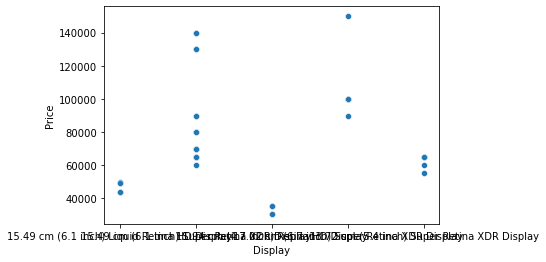

In [25]:
sns.scatterplot(x=new['Display'],y=new['Price'])

# Skewness

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


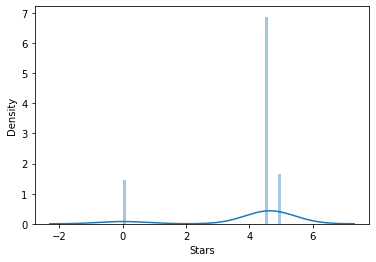

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


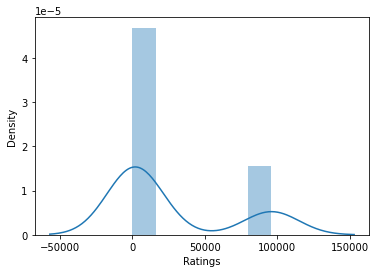

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


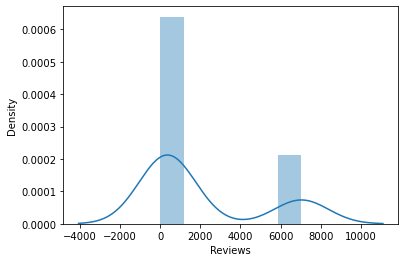

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


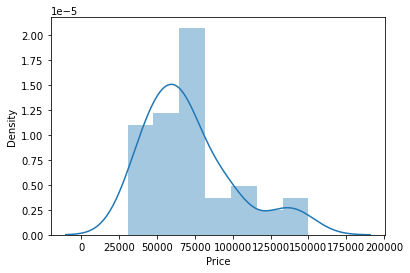

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '64 GB ROM'

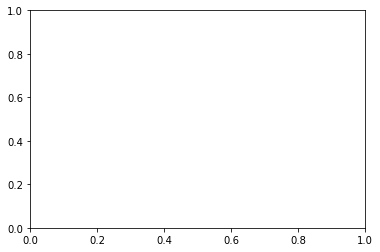

In [26]:
def distplot(col):
    sns.distplot(new[col])
    plt.show()
    
for i in list(new.columns)[1:]:
    distplot(i)

<AxesSubplot:xlabel='ProductName', ylabel='Price'>

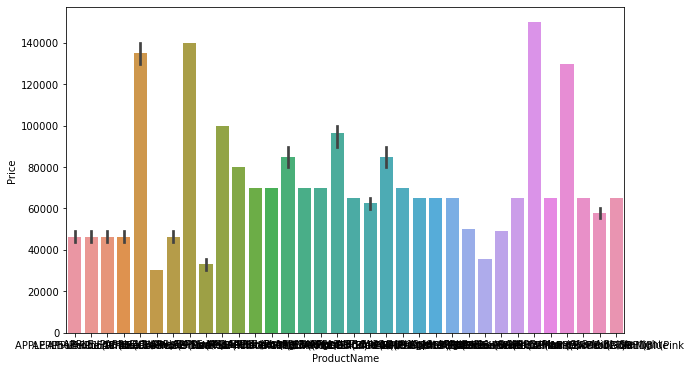

In [27]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'ProductName',y = 'Price', data = new)

<AxesSubplot:xlabel='ProductName', ylabel='Ratings'>

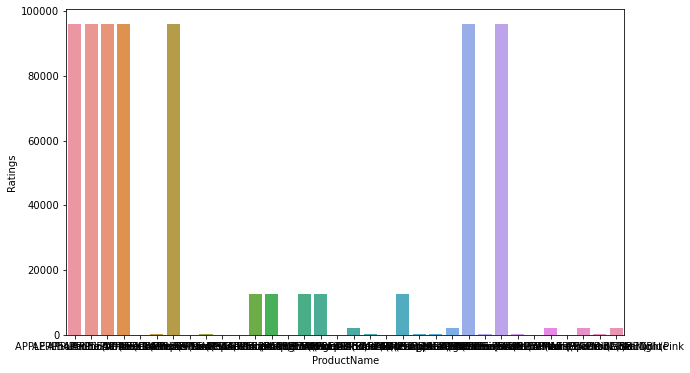

In [28]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'ProductName',y = 'Ratings', data = new)

# Distribution Of Plots


C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


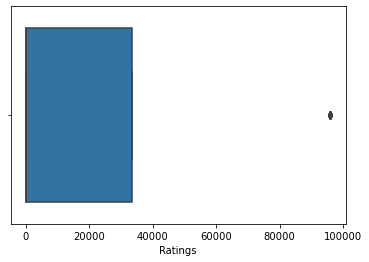

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


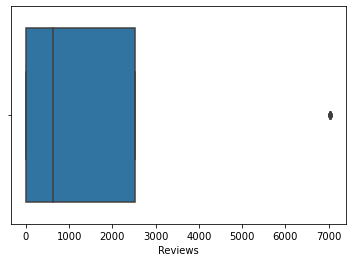

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


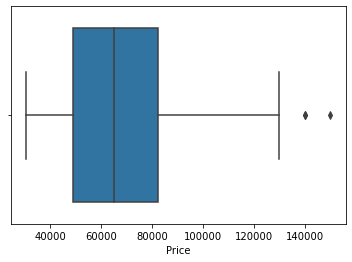

In [29]:
# find the distribution of plots
def boxplot(col):
    sns.boxplot(new[col])
    plt.show()
    
for i in list(new.select_dtypes(exclude=['object']).columns)[1:]:
    boxplot(i)

<AxesSubplot:>

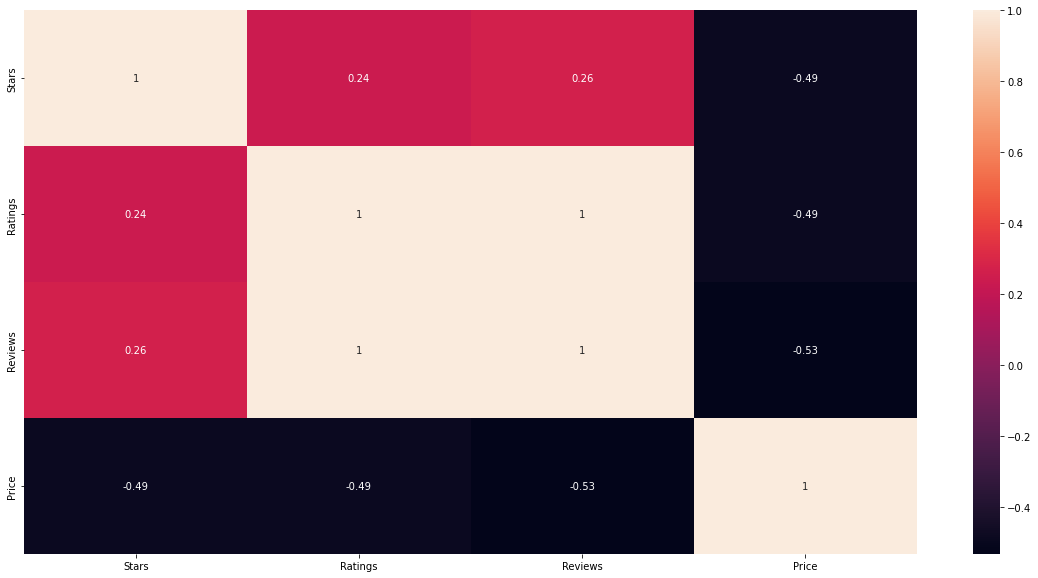

In [30]:
plt.figure(figsize=(20, 10))
sns.heatmap(new.corr(),annot=True)

In [31]:
corr_matrix = new.corr()


In [32]:
 corr_matrix["Ratings"].sort_values(ascending=False)


Ratings    1.000000
Reviews    0.996262
Stars      0.237663
Price     -0.485087
Name: Ratings, dtype: float64

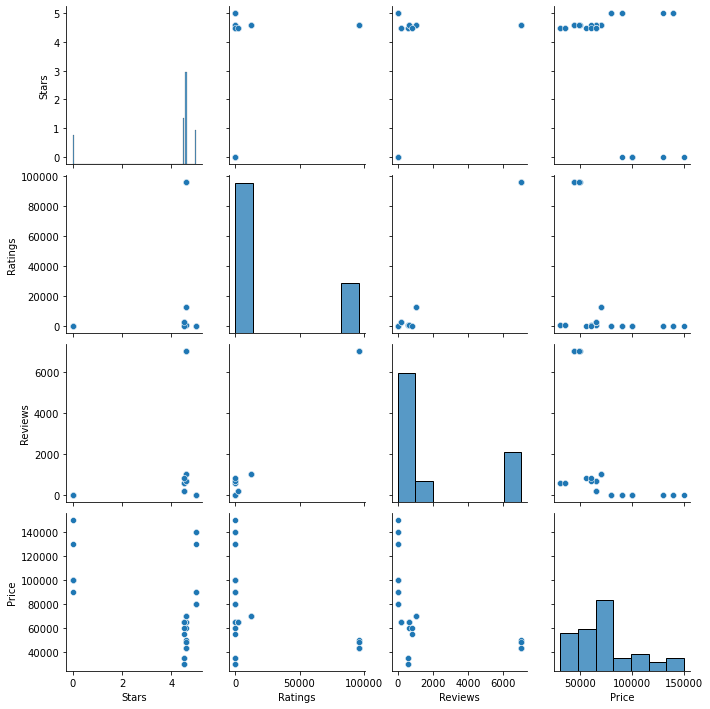

In [33]:
sns.pairplot(new)

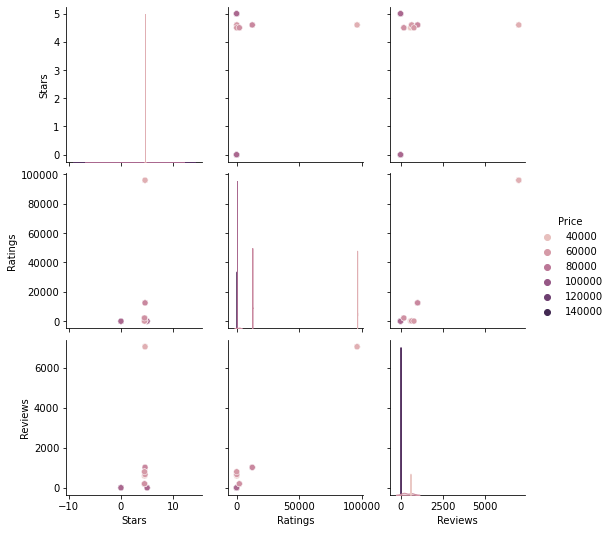

In [34]:
sns.pairplot(new,hue='Price')


# Feature Engineering

# Display

In [35]:
new.head()

,ProductName,Stars,Ratings,Reviews,Price,ROM,Display,Camera,Processorr
0,APPLE iPhone 11 (White,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
1,APPLE iPhone 11 (White,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
2,APPLE iPhone 11 (Black,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
3,APPLE iPhone 11 (Green,4.6,95977,7038,48900,128 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor
4,APPLE iPhone 11 (Black,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor


In [36]:
# clean the Display column

In [37]:
new['Liquid_Retina_HD'] = new['Display'].apply(lambda x:1 if 'Liquid Retina HD Display' in x else 0)
new['Super_Retina_XDR'] = new['Display'].apply(lambda x:1 if 'Super Retina XDR Display' in x else 0)

In [38]:
new.sample(5)

,ProductName,Stars,Ratings,Reviews,Price,ROM,Display,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
8,APPLE iPhone 11 (Red,4.6,95977,7038,43900,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0
11,APPLE iPhone SE (White,4.5,152,596,35499,128 GB ROM,11.94 cm (4.7 inch) Retina HD Display,12MP Rear Camera | 7MP Front Camera,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,0,0
20,APPLE iPhone 14 (Purple,5.0,3,0,79900,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip 6 Core Processor Processor,0,1
10,APPLE iPhone 14 Pro (Silver,5.0,4,1,129900,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,48MP + 12MP + 12MP + 12MP | 12MP Front Camera,A16 Bionic Chip 6 Core Processor Processor,0,1
45,APPLE iPhone 12 (Purple,4.6,181,662,59900,64 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,0,1


In [39]:
new['Display'].value_counts()

15.49 cm (6.1 inch) Super Retina XDR Display    19
15.49 cm (6.1 inch) Liquid Retina HD Display    12
13.72 cm (5.4 inch) Super Retina XDR Display     7
17.02 cm (6.7 inch) Super Retina XDR Display     6
11.94 cm (4.7 inch) Retina HD Display            4
Name: Display, dtype: int64

In [40]:
final = new.drop('Display',axis=1)

In [41]:
final.sample(5)

,ProductName,Stars,Ratings,Reviews,Price,ROM,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
32,APPLE iPhone 14 (Purple,5.0,3,0,89900,256 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip 6 Core Processor Processor,0,1
43,APPLE iPhone 13 Mini (Starlight,4.5,2188,197,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,0,1
26,APPLE iPhone 12 (Purple,4.6,181,662,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,0,1
30,APPLE iPhone 12 (Green,4.6,181,662,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,0,1
4,APPLE iPhone 11 (Black,4.6,95977,7038,43900,64 GB ROM,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0


# ProductName

In [42]:
final['ProductName'] = final['ProductName'].str.replace('$', '', regex=True).replace('\,', '.', regex=True)


In [43]:
final['ProductName'] = final['ProductName'].str.replace(")",'')

C:\Users\rajesh\AppData\Local\Temp\ipykernel_18340\2242520711.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final['ProductName'] = final['ProductName'].str.replace(")",'')


In [44]:
final[30:40]

,ProductName,Stars,Ratings,Reviews,Price,ROM,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
30,APPLE iPhone 12 (Green,4.6,181,662,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,0,1
31,APPLE iPhone 13 Mini (Blue,4.5,2188,197,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,0,1
32,APPLE iPhone 14 (Purple,5.0,3,0,89900,256 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip 6 Core Processor Processor,0,1
33,Apple iPhone 11 (Green,4.6,95955,7038,49900,64 GB ROM,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0
34,APPLE iPhone 14 ((PRODUCTRED,5.0,3,0,89900,256 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip 6 Core Processor Processor,0,1
35,APPLE iPhone SE (Black,4.5,152,589,35499,128 GB ROM,12MP Rear Camera | 7MP Front Camera,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,0,0
36,APPLE iPhone 11 (Yellow,4.6,95955,7038,48900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0
37,APPLE iPhone 12 (White,4.6,181,662,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,0,1
38,APPLE iPhone 14 Pro Max (Space Black,0.0,0,0,149900,256 GB ROM,48MP + 12MP + 12MP + 12MP | 12MP Front Camera,A16 Bionic Chip 6 Core Processor Processor,0,1
39,APPLE iPhone 13 Mini ((PRODUCTRED,4.5,2188,197,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,0,1


In [45]:
final['ProductName'] = final['ProductName'].str.replace("(",'')

C:\Users\rajesh\AppData\Local\Temp\ipykernel_18340\3343722985.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final['ProductName'] = final['ProductName'].str.replace("(",'')


In [46]:
final[30:40]

,ProductName,Stars,Ratings,Reviews,Price,ROM,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
30,APPLE iPhone 12 Green,4.6,181,662,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,0,1
31,APPLE iPhone 13 Mini Blue,4.5,2188,197,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,0,1
32,APPLE iPhone 14 Purple,5.0,3,0,89900,256 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip 6 Core Processor Processor,0,1
33,Apple iPhone 11 Green,4.6,95955,7038,49900,64 GB ROM,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0
34,APPLE iPhone 14 PRODUCTRED,5.0,3,0,89900,256 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip 6 Core Processor Processor,0,1
35,APPLE iPhone SE Black,4.5,152,589,35499,128 GB ROM,12MP Rear Camera | 7MP Front Camera,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,0,0
36,APPLE iPhone 11 Yellow,4.6,95955,7038,48900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0
37,APPLE iPhone 12 White,4.6,181,662,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,0,1
38,APPLE iPhone 14 Pro Max Space Black,0.0,0,0,149900,256 GB ROM,48MP + 12MP + 12MP + 12MP | 12MP Front Camera,A16 Bionic Chip 6 Core Processor Processor,0,1
39,APPLE iPhone 13 Mini PRODUCTRED,4.5,2188,197,64900,128 GB ROM,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,0,1


# Rom

In [47]:
#removing gb in rom column

In [48]:
final['ROM'] = final['ROM'].str.replace('GB ROM','')

In [49]:
final['ROM'] = final['ROM'].astype('int32')

In [50]:
final.head(2)

,ProductName,Stars,Ratings,Reviews,Price,ROM,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
0,APPLE iPhone 11 White,4.6,95977,7038,43900,64,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0
1,APPLE iPhone 11 White,4.6,95977,7038,48900,128,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,1,0


# Camera

In [51]:
final['Camera'] = final['Camera'].str.replace('12MP + 12MP | 12MP Front Camera','12MP')
final['Camera'] = final['Camera'].str.replace('Rear Camera','')
final['Camera'] = final['Camera'].str.replace('Front Camera','')
final['Camera'] = final['Camera'].str.replace('|','')

C:\Users\rajesh\AppData\Local\Temp\ipykernel_18340\2628332049.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final['Camera'] = final['Camera'].str.replace('12MP + 12MP | 12MP Front Camera','12MP')
C:\Users\rajesh\AppData\Local\Temp\ipykernel_18340\2628332049.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final['Camera'] = final['Camera'].str.replace('|','')


In [52]:
final.head()

,ProductName,Stars,Ratings,Reviews,Price,ROM,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
0,APPLE iPhone 11 White,4.6,95977,7038,43900,64,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
1,APPLE iPhone 11 White,4.6,95977,7038,48900,128,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
2,APPLE iPhone 11 Black,4.6,95977,7038,48900,128,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
3,APPLE iPhone 11 Green,4.6,95977,7038,48900,128,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
4,APPLE iPhone 11 Black,4.6,95977,7038,43900,64,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0


In [53]:
#removing Reviews colum
df_final = final.drop('Reviews',axis=1)

In [54]:
df_final.head()

,ProductName,Stars,Ratings,Price,ROM,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
0,APPLE iPhone 11 White,4.6,95977,43900,64,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
1,APPLE iPhone 11 White,4.6,95977,48900,128,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
2,APPLE iPhone 11 Black,4.6,95977,48900,128,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
3,APPLE iPhone 11 Green,4.6,95977,48900,128,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0
4,APPLE iPhone 11 Black,4.6,95977,43900,64,12MP + 12MP 12MP,A13 Bionic Chip Processor,1,0


# Label Encoder

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
list1=['ProductName','Camera','Processorr']
for i in list1:
    df_final[i]=le.fit_transform(df_final[i])
    
df_final.head()

,ProductName,Stars,Ratings,Price,ROM,Camera,Processorr,Liquid_Retina_HD,Super_Retina_XDR
0,4,4.6,95977,43900,64,1,0,1,0
1,4,4.6,95977,48900,128,1,0,1,0
2,0,4.6,95977,48900,128,1,0,1,0
3,1,4.6,95977,48900,128,1,0,1,0
4,0,4.6,95977,43900,64,1,0,1,0


In [57]:
#saving file to csv
df_final.to_csv('Iphone_df.csv',index=False)

In [58]:
# saving file to csv and doing next process